# COMP9414 2024T2 - Assignment 2 

In [2]:
import gym
import numpy as np
import random
import matplotlib.pyplot as plt

In [3]:
env = gym.make("Taxi-v3" , render_mode="ansi").env
state = env.reset() # set the environment to the initial state
render_env = env.render()
print(render_env)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+




1) Taxi's Position: 5 rows * 5 columns = 25 possible positions.
2) Passenger's Location: 5 possible locations (4 fixed positions + 1 inside the taxi).
3) Destination: 4 possible destinations.

Thus, the total number of states is:
25
 (taxi positions)
×
5
 (passenger locations)
×
4
 (destinations)
=
500
 states


# Part 1 Q-table Training

## 1.1 Q- Learning

* Q-learning equation:

\begin{equation}
Q(s_t,a_t) \leftarrow (1-\alpha)Q(s_t,a_t)+\alpha[r_{t+1}+\gamma\max_{a \in A(s_{t+1})} Q(s_{t+1},a)]
\end{equation}

In [8]:
# Initialize Q-table with zeros & rows representing states and columns representing actions
q_table = np.zeros([env.observation_space.n, env.action_space.n])

# Hyperparameters
alpha = 0.3  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.01  # Exploration rate

# Training details
num_episodes = 5000  # Total number of episodes for training
result_total_steps = []  # The number of steps per episode
result_accumulated_rewards = []  # The accumulated rewards per episode
result_steps_episode = []  # The steps taken in each episode

In [9]:
for i in range(num_episodes): #Decide the number of training episodes
    
    #initialize state, step and reward
    state = env.reset()
    state = state[0] if isinstance(state, tuple) else state # extract the state number from the tuple
    count_steps, accum_reward = 0, 0
    end = False

    while not end:
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()  # Explore action space
        else:
            action = np.argmax(q_table[state])  # Exploit learned values

        # Take acton to the next state
        step_result = env.step(action)

        # reward: The reward received after the action, based on the following conditions:
        #   1) Penalized step: -1 (step penalty)
        #   2) Illegal action: -10 (penalty for illegal action)
        #   3) Delivering: +20 (reward for successful delivery)
        
        next_state = step_result[0]
        reward = step_result[1]
        end = step_result[2] # Control the end of the episode

        # Update Q-table
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state, action] = new_value
        
        # Update the state
        state = next_state 

        accum_reward += reward
        count_steps += 1

    result_total_steps.append(count_steps)
    result_accumulated_rewards.append(accum_reward)  # Store accumulated reward
    result_steps_episode.append(count_steps)

print("Training finished.\n")

/opt/anaconda3/lib/python3.12/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Training finished.



In [10]:
np.save('q_table_Qlearning.npy', q_table)

print("Q_table for Q-learning Saved")

Q_table for Q-learning Saved


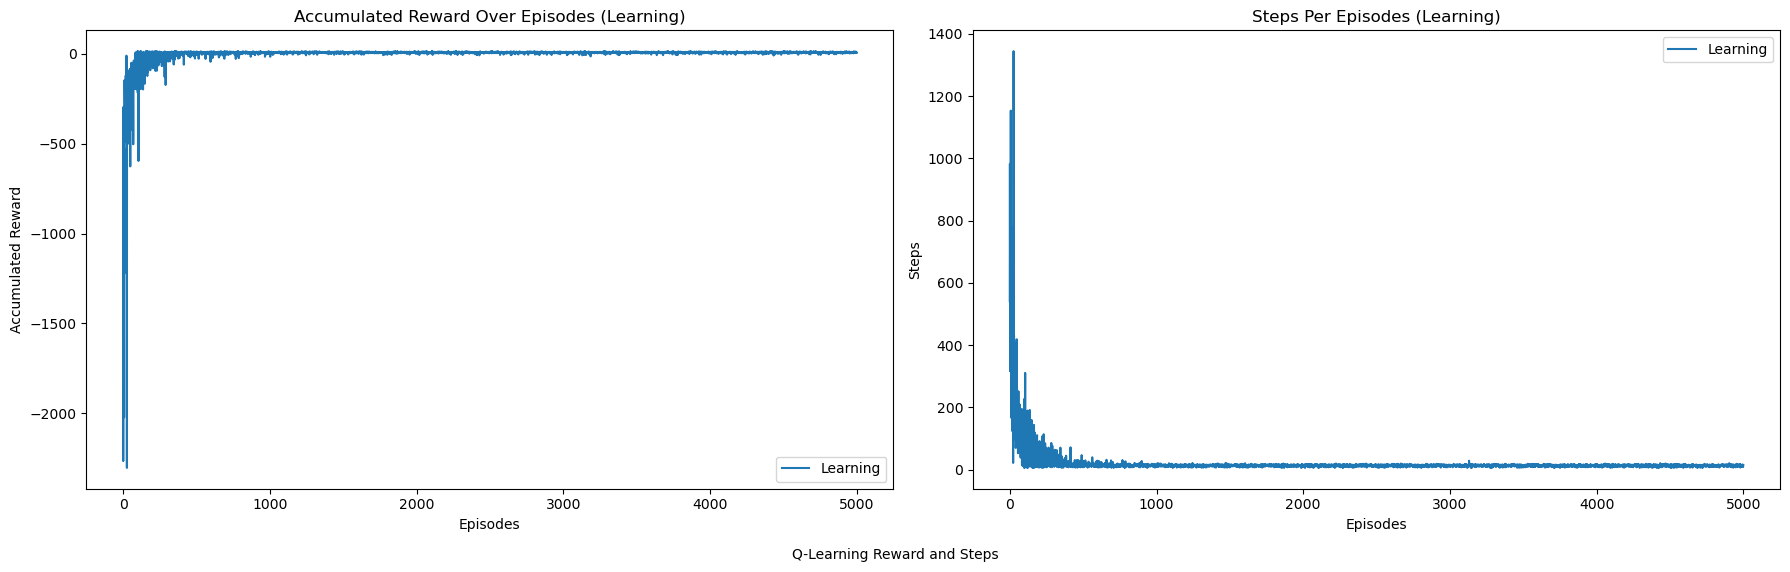

In [11]:
# Plot the accumulated rewards and steps per episode 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

axes[0].plot(result_accumulated_rewards, label='Learning')
axes[0].set_xlabel('Episodes')
axes[0].set_ylabel('Accumulated Reward')
axes[0].set_title('Accumulated Reward Over Episodes (Learning)')
axes[0].legend()

axes[1].plot(result_total_steps, label='Learning')
axes[1].set_xlabel('Episodes')
axes[1].set_ylabel('Steps')
axes[1].set_title('Steps Per Episodes (Learning)')
axes[1].legend()

fig.text(0.5, 0.01, 'Q-Learning Reward and Steps', ha='center')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit the label
plt.show()

## 1.2 SARSA Learning

* SARSA equation:
\begin{equation}
Q(s_t,a_t) \leftarrow (1-\alpha)Q(s_t,a_t)+\alpha[r_{t+1}+\gamma Q(s_{t+1},a_{t+1})]
\end{equation}

In [14]:
# Initialize Q-table with zeros & rows representing states and columns representing actions
q_table_sarsa = np.zeros([env.observation_space.n, env.action_space.n])

# Hyperparameters
alpha = 0.3  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.01  # Exploration rate

# Training details
num_episodes = 5000  # Total number of episodes for training
result_total_steps = []  # The number of steps per episode
result_accumulated_rewards = []  # The accumulated rewards per episode
result_steps_episode = []  # The steps taken in each episode

In [15]:
for i in range(num_episodes): 
    state = env.reset()
    state = state[0] if isinstance(state, tuple) else state
    count_steps, accum_reward = 0, 0
    end = False

    if random.uniform(0, 1) < epsilon:  #epsilon greed for action
        action = env.action_space.sample()
    else:
        action = np.argmax(q_table_sarsa[state])

    while not end:
        # Take action to the next state
        step_result = env.step(action)
        
        next_state = step_result[0]
        reward = step_result[1]
        end = step_result[2] # Control the end of the episode

        if random.uniform(0, 1) < epsilon: #epsilon greed for action
            next_action = env.action_space.sample()  
        else:
            next_action = np.argmax(q_table_sarsa[next_state])  

        # Update Q-table
        old_value = q_table_sarsa[state, action]
        next_value = q_table_sarsa[next_state, next_action] #Update both state and action
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_value)
        q_table_sarsa[state, action] = new_value
        
        # Update the state and action
        state, action = next_state, next_action

        accum_reward += reward
        count_steps += 1

    result_total_steps.append(count_steps)
    result_accumulated_rewards.append(accum_reward)  # Store accumulated reward
    result_steps_episode.append(count_steps)

print("Training finished.")


Training finished.


In [16]:
np.save('q_table_Qlearning.npy', q_table)

print("Q_table for Q-learning Saved")

Q_table for Q-learning Saved


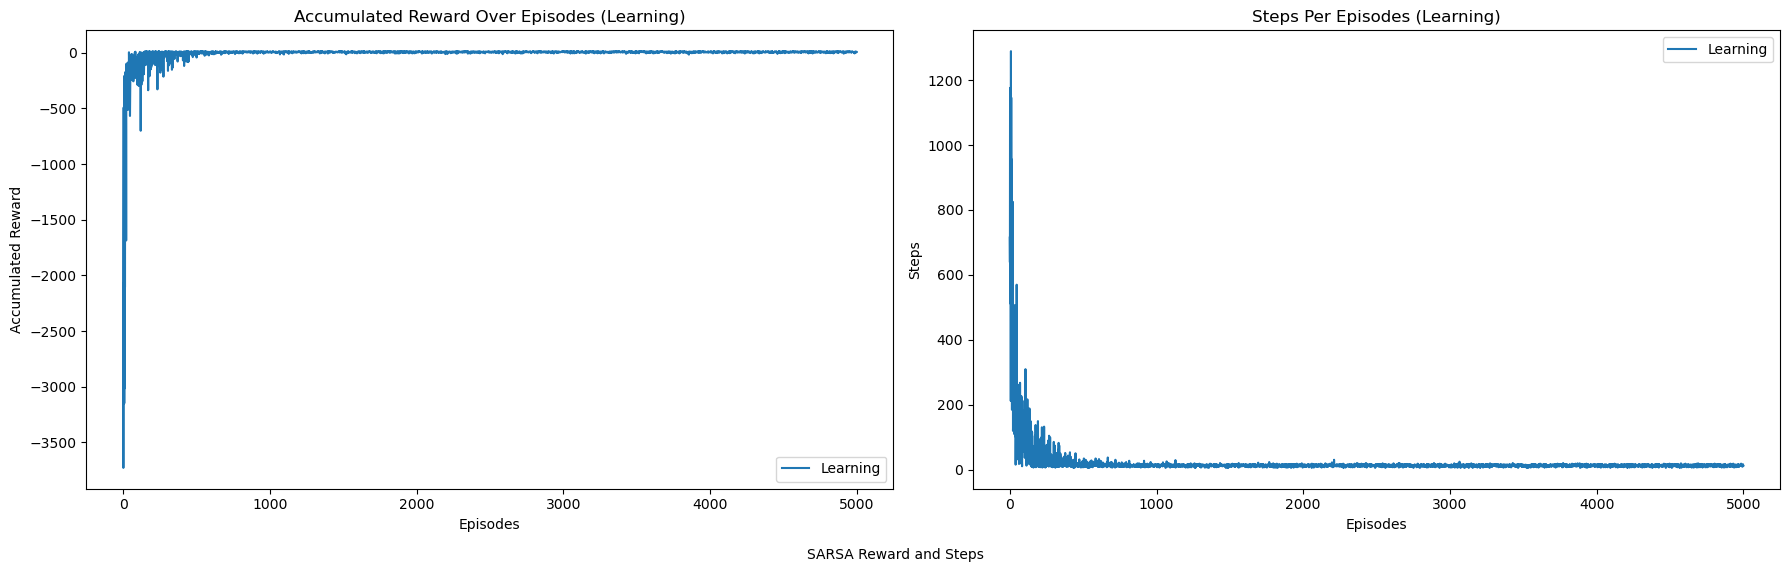

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Plotting the accumulated rewards
axes[0].plot(result_accumulated_rewards, label='Learning')
axes[0].set_xlabel('Episodes')
axes[0].set_ylabel('Accumulated Reward')
axes[0].set_title('Accumulated Reward Over Episodes (Learning)')
axes[0].legend()

# Plotting the steps per episode
axes[1].plot(result_total_steps, label='Learning')
axes[1].set_xlabel('Episodes')
axes[1].set_ylabel('Steps')
axes[1].set_title('Steps Per Episodes (Learning)')
axes[1].legend()

# Adding the combined label below the x-axis
fig.text(0.5, 0.01, 'SARSA Reward and Steps', ha='center')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit the label
plt.show()


# Part 2 Rewards and Steps Evaluation

In [19]:
def evaluate_agent(env, q_table, episodes=1000, max_steps=100):
    count_steps = 0
    eval_rewards = []
    eval_steps = []

    for _ in range(episodes):
        state = env.reset()
        state = state[0] if isinstance(state, tuple) else state
        steps, accum_reward = 0, 0
        end = False

        while not end and steps < max_steps:  # Check for maximum steps
            action = np.argmax(q_table[state]) # greedy action selection
            step_result = env.step(action)
            next_state = step_result[0]
            reward = step_result[1]
            end = step_result[2]
            state = next_state
            accum_reward += reward
            steps += 1

        eval_rewards.append(accum_reward)  # Store accumulated reward
        eval_steps.append(steps)  # Store steps per episode
        count_steps += steps

    average_steps = count_steps / episodes
    average_rewards = np.mean(eval_rewards)

    print(f"Testing {episodes} episodes:")
    print(f"Average timesteps: {average_steps}")
    print(f"Average accumulated reward: {average_rewards}")

    return eval_rewards, eval_steps, average_steps, average_rewards


## 2.1 Q-learning

In [21]:
eval_rewards_q, eval_steps_q, avg_steps_q, avg_reward_q = evaluate_agent(env, q_table)

Testing 1000 episodes:
Average timesteps: 13.034
Average accumulated reward: 7.966


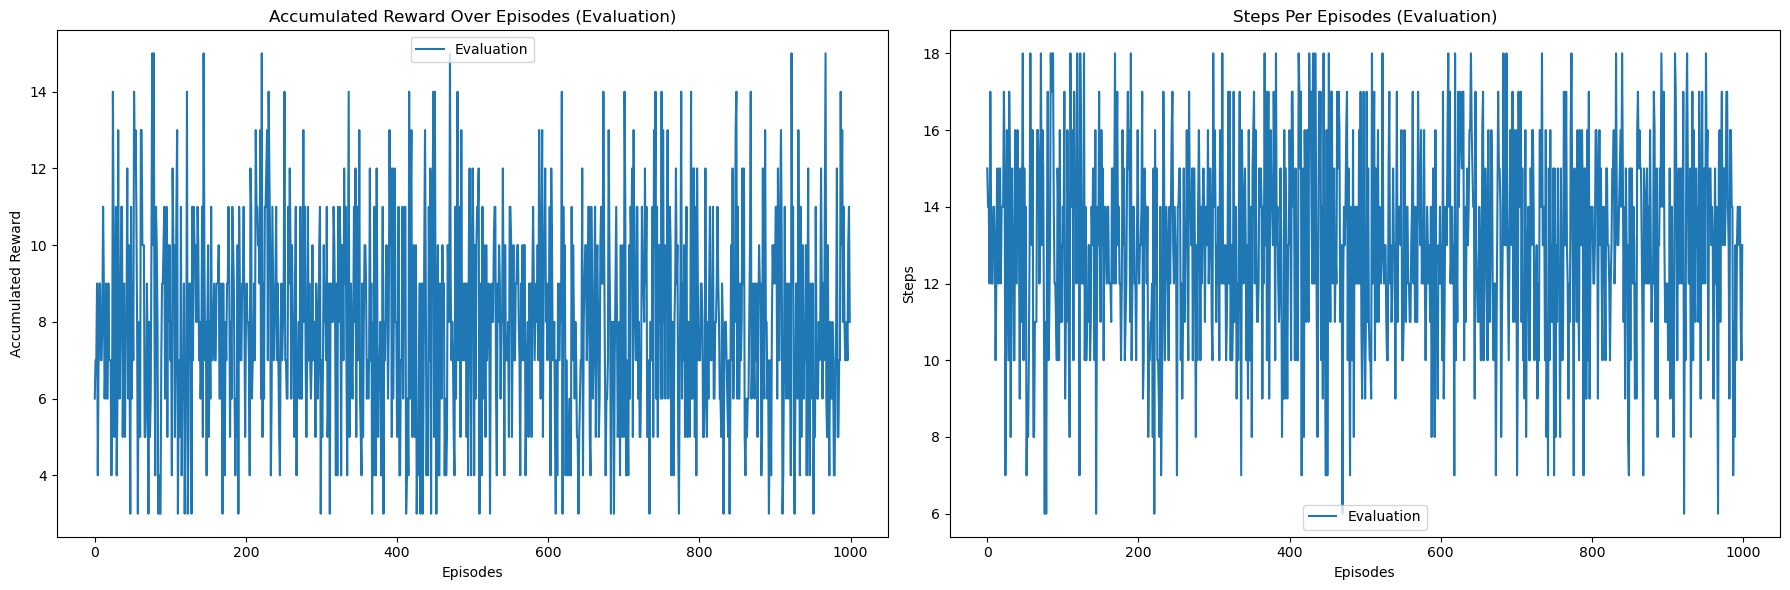

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

axes[0].plot(eval_rewards_q, label='Evaluation')
axes[0].set_xlabel('Episodes')
axes[0].set_ylabel('Accumulated Reward')
axes[0].set_title('Accumulated Reward Over Episodes (Evaluation)')
axes[0].legend()

axes[1].plot(eval_steps_q, label='Evaluation')
axes[1].set_xlabel('Episodes')
axes[1].set_ylabel('Steps')
axes[1].set_title('Steps Per Episodes (Evaluation)')
axes[1].legend()

plt.tight_layout()
plt.show()

## 2.2 SARSA Learning

In [24]:
eval_rewards_sarsa, eval_steps_sarsa, avg_steps_sarsa, avg_reward_sarsa = evaluate_agent(env, q_table_sarsa)

Testing 1000 episodes:
Average timesteps: 13.238
Average accumulated reward: 7.762


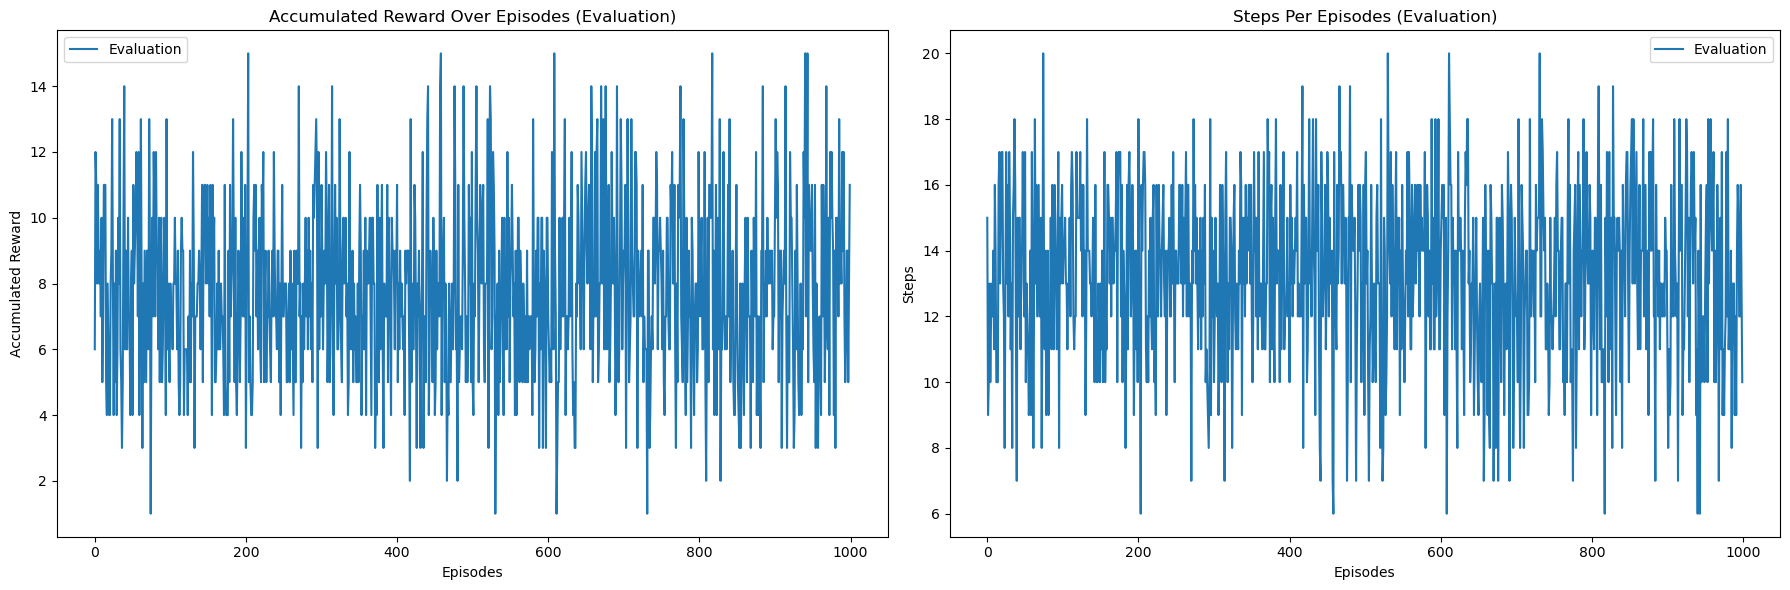

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

axes[0].plot(eval_rewards_sarsa, label='Evaluation')
axes[0].set_xlabel('Episodes')
axes[0].set_ylabel('Accumulated Reward')
axes[0].set_title('Accumulated Reward Over Episodes (Evaluation)')
axes[0].legend()

axes[1].plot(eval_steps_sarsa, label='Evaluation')
axes[1].set_xlabel('Episodes')
axes[1].set_ylabel('Steps')
axes[1].set_title('Steps Per Episodes (Evaluation)')
axes[1].legend()

plt.tight_layout()
plt.show()

# Part 3 Visualize the trained agent

In [27]:
import time
from IPython.display import clear_output
def visualize_agent(env, q_table, max_steps=100):
    state = env.reset()
    state = state[0] if isinstance(state, tuple) else state
    end = False
    total_reward = 0

    for step in range(max_steps):
        clear_output(wait=True)
        print(env.render())  # render in ansi mode and print the output
        
        action = np.argmax(q_table[state])
        result = env.step(action)

        if len(result) == 5:
            next_state, reward, end, truncated, _ = result
            end = end or truncated
        else:
            next_state, reward, end, _ = result

        next_state = next_state[0] if isinstance(next_state, tuple) else next_state
        total_reward += reward

        print(f"Step: {step}")
        print(f"State: {state}, Action: {action}, Reward: {reward}, Total Accumulated Reward: {total_reward}")

        state = next_state
        time.sleep(0.2)

        if end:
            break

    clear_output(wait=True)
    print("Episode completed.")
    print(env.render())  # render in ansi mode and print the output

In [28]:
visualize_agent(env, q_table)

Episode completed.
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)



In [29]:
visualize_agent(env, q_table_sarsa)

Episode completed.
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)



# Part 4 Reference

## 4.1 Hyperparameter Tuning

In [32]:
from itertools import product

# Function to set seeds for reproducibility
def set_seed(seed, env):
    np.random.seed(seed)
    random.seed(seed)
    env.reset(seed=seed)
    env.action_space.seed(seed)
    env.observation_space.seed(seed)

seed = 1234 
set_seed(seed, env)

# Define the grid of hyperparameters
alpha_values = [0.1, 0.2, 0.3]
gamma_values = [0.85, 0.9, 0.95]
epsilon_values = [0.01, 0.05, 0.1]
num_episodes = 5000

# Store the results
best_combination = None
best_reward = -float('inf')

# Iterate over all combinations of hyperparameters
for alpha, gamma, epsilon in product(alpha_values, gamma_values, epsilon_values):
    # Initialize Q-table with zeros
    q_table = np.zeros([env.observation_space.n, env.action_space.n])
    total_rewards = []

    # Set the seed for each run to ensure reproducibility
    set_seed(seed, env)

    for i in range(num_episodes):
        state = env.reset()
        state = state[0] if isinstance(state, tuple) else state
        accum_reward = 0
        end = False

        while not end:
            if random.uniform(0, 1) < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(q_table[state])

            step_result = env.step(action)
            next_state, reward, end, _, _ = step_result
            next_state = next_state[0] if isinstance(next_state, tuple) else next_state

            old_value = q_table[state, action]
            next_max = np.max(q_table[next_state])
            new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
            q_table[state, action] = new_value

            state = next_state
            accum_reward += reward

        total_rewards.append(accum_reward)

    average_reward = np.mean(total_rewards)

    if average_reward > best_reward:
        best_reward = average_reward
        best_combination = (alpha, gamma, epsilon)

    print(f"Alpha: {alpha}, Gamma: {gamma}, Epsilon: {epsilon}, Average Reward: {average_reward}")

print(f"\nBest hyperparameters: Alpha: {best_combination[0]}, Gamma: {best_combination[1]}, Epsilon: {best_combination[2]}")


Alpha: 0.1, Gamma: 0.85, Epsilon: 0.01, Average Reward: -14.782
Alpha: 0.1, Gamma: 0.85, Epsilon: 0.05, Average Reward: -17.706
Alpha: 0.1, Gamma: 0.85, Epsilon: 0.1, Average Reward: -21.8696
Alpha: 0.1, Gamma: 0.9, Epsilon: 0.01, Average Reward: -14.5982
Alpha: 0.1, Gamma: 0.9, Epsilon: 0.05, Average Reward: -17.4054
Alpha: 0.1, Gamma: 0.9, Epsilon: 0.1, Average Reward: -21.4858
Alpha: 0.1, Gamma: 0.95, Epsilon: 0.01, Average Reward: -14.1808
Alpha: 0.1, Gamma: 0.95, Epsilon: 0.05, Average Reward: -16.5912
Alpha: 0.1, Gamma: 0.95, Epsilon: 0.1, Average Reward: -20.8944
Alpha: 0.2, Gamma: 0.85, Epsilon: 0.01, Average Reward: -5.0482
Alpha: 0.2, Gamma: 0.85, Epsilon: 0.05, Average Reward: -7.9124
Alpha: 0.2, Gamma: 0.85, Epsilon: 0.1, Average Reward: -11.731
Alpha: 0.2, Gamma: 0.9, Epsilon: 0.01, Average Reward: -4.9166
Alpha: 0.2, Gamma: 0.9, Epsilon: 0.05, Average Reward: -7.33
Alpha: 0.2, Gamma: 0.9, Epsilon: 0.1, Average Reward: -11.2964
Alpha: 0.2, Gamma: 0.95, Epsilon: 0.01, Avera

In [33]:
env = gym.make("Taxi-v3").env
seed = 1234  # You can change this to any integer value
set_seed(seed, env)

# Define the grid of hyperparameters
alpha_values = [0.1, 0.2, 0.3]
gamma_values = [0.8, 0.9, 0.95]
epsilon_values = [0.01, 0.05, 0.1]
num_episodes = 5000

# Store the results
best_combination = None
best_reward = -float('inf')

# Initialize lists to store results
num_episodes = 5000

# Iterate over all combinations of hyperparameters
for alpha, gamma, epsilon in product(alpha_values, gamma_values, epsilon_values):
    # Initialize Q-table with zeros
    q_table_sarsa = np.zeros([env.observation_space.n, env.action_space.n])
    total_rewards = []

    # Set the seed for each run to ensure reproducibility
    set_seed(seed, env)

    for i in range(num_episodes):
        state = env.reset()
        state = state[0] if isinstance(state, tuple) else state
        count_steps, accum_reward = 0, 0
        end = False

        # Choose an action using epsilon-greedy policy
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table_sarsa[state])

        while not end:
            # Take action and observe the next state and reward
            step_result = env.step(action)
            next_state, reward, end, _, _ = step_result
            next_state = next_state[0] if isinstance(next_state, tuple) else next_state

            # Choose the next action using epsilon-greedy policy
            if random.uniform(0, 1) < epsilon:
                next_action = env.action_space.sample()
            else:
                next_action = np.argmax(q_table_sarsa[next_state])

            # Update Q-table using the SARSA update rule
            old_value = q_table_sarsa[state, action]
            next_value = q_table_sarsa[next_state, next_action]
            new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_value)
            q_table_sarsa[state, action] = new_value

            # Update the state and action
            state, action = next_state, next_action

            accum_reward += reward
            count_steps += 1

        total_rewards.append(accum_reward)
        
    average_reward = np.mean(total_rewards)

    if average_reward > best_reward:
        best_reward = average_reward
        best_combination = (alpha, gamma, epsilon)

    print(f"Alpha: {alpha}, Gamma: {gamma}, Epsilon: {epsilon}, Average Reward: {average_reward}")

print(f"\nBest hyperparameters: Alpha: {best_combination[0]}, Gamma: {best_combination[1]}, Epsilon: {best_combination[2]}")


Alpha: 0.1, Gamma: 0.8, Epsilon: 0.01, Average Reward: -16.8164
Alpha: 0.1, Gamma: 0.8, Epsilon: 0.05, Average Reward: -22.4102
Alpha: 0.1, Gamma: 0.8, Epsilon: 0.1, Average Reward: -38.9684
Alpha: 0.1, Gamma: 0.9, Epsilon: 0.01, Average Reward: -15.9714
Alpha: 0.1, Gamma: 0.9, Epsilon: 0.05, Average Reward: -20.1414
Alpha: 0.1, Gamma: 0.9, Epsilon: 0.1, Average Reward: -25.8806
Alpha: 0.1, Gamma: 0.95, Epsilon: 0.01, Average Reward: -15.8504
Alpha: 0.1, Gamma: 0.95, Epsilon: 0.05, Average Reward: -19.2522
Alpha: 0.1, Gamma: 0.95, Epsilon: 0.1, Average Reward: -25.3092
Alpha: 0.2, Gamma: 0.8, Epsilon: 0.01, Average Reward: -7.3592
Alpha: 0.2, Gamma: 0.8, Epsilon: 0.05, Average Reward: -18.6124
Alpha: 0.2, Gamma: 0.8, Epsilon: 0.1, Average Reward: -42.9042
Alpha: 0.2, Gamma: 0.9, Epsilon: 0.01, Average Reward: -6.8396
Alpha: 0.2, Gamma: 0.9, Epsilon: 0.05, Average Reward: -9.8408
Alpha: 0.2, Gamma: 0.9, Epsilon: 0.1, Average Reward: -17.1208
Alpha: 0.2, Gamma: 0.95, Epsilon: 0.01, Avera

## 4.2 Softmax Q-learning

In [35]:
import numpy as np
import random
from itertools import product
from scipy.special import softmax

# Function to set seeds for reproducibility
def set_seed(seed, env):
    np.random.seed(seed)
    random.seed(seed)
    env.reset(seed=seed)
    env.action_space.seed(seed)
    env.observation_space.seed(seed)

seed = 1234 
set_seed(seed, env)

# Define the grid of hyperparameters
alpha_values = [0.1, 0.2, 0.3]
gamma_values = [0.85, 0.9, 0.95]
temperature_values = [0.1, 0.5, 1.0]  # Temperature parameter for softmax
num_episodes = 5000

# Store the results
best_combination = None
best_reward = -float('inf')

# Iterate over all combinations of hyperparameters
for alpha, gamma, temperature in product(alpha_values, gamma_values, temperature_values):
    # Initialize Q-table with zeros
    q_table = np.zeros([env.observation_space.n, env.action_space.n])
    total_rewards = []

    # Set the seed for each run to ensure reproducibility
    set_seed(seed, env)

    for i in range(num_episodes):
        state = env.reset()
        state = state[0] if isinstance(state, tuple) else state
        accum_reward = 0
        end = False

        while not end:
            # Calculate softmax probabilities for action selection
            action_probabilities = softmax(q_table[state] / temperature)
            action = np.random.choice(np.arange(env.action_space.n), p=action_probabilities)

            step_result = env.step(action)
            next_state, reward, end, _, _ = step_result
            next_state = next_state[0] if isinstance(next_state, tuple) else next_state

            old_value = q_table[state, action]
            next_max = np.max(q_table[next_state])
            new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
            q_table[state, action] = new_value

            state = next_state
            accum_reward += reward

        total_rewards.append(accum_reward)

    average_reward = np.mean(total_rewards)

    if average_reward > best_reward:
        best_reward = average_reward
        best_combination = (alpha, gamma, temperature)

    print(f"Alpha: {alpha}, Gamma: {gamma}, Temperature: {temperature}, Average Reward: {average_reward}")

print(f"\nBest hyperparameters: Alpha: {best_combination[0]}, Gamma: {best_combination[1]}, Temperature: {best_combination[2]}")


Alpha: 0.1, Gamma: 0.85, Temperature: 0.1, Average Reward: -17.6184
Alpha: 0.1, Gamma: 0.85, Temperature: 0.5, Average Reward: -29.784
Alpha: 0.1, Gamma: 0.85, Temperature: 1.0, Average Reward: -44.537
Alpha: 0.1, Gamma: 0.9, Temperature: 0.1, Average Reward: -17.663
Alpha: 0.1, Gamma: 0.9, Temperature: 0.5, Average Reward: -28.3076
Alpha: 0.1, Gamma: 0.9, Temperature: 1.0, Average Reward: -37.3244
Alpha: 0.1, Gamma: 0.95, Temperature: 0.1, Average Reward: -16.5882
Alpha: 0.1, Gamma: 0.95, Temperature: 0.5, Average Reward: -25.1346
Alpha: 0.1, Gamma: 0.95, Temperature: 1.0, Average Reward: -34.7374
Alpha: 0.2, Gamma: 0.85, Temperature: 0.1, Average Reward: -5.9316
Alpha: 0.2, Gamma: 0.85, Temperature: 0.5, Average Reward: -12.3978
Alpha: 0.2, Gamma: 0.85, Temperature: 1.0, Average Reward: -24.6864
Alpha: 0.2, Gamma: 0.9, Temperature: 0.1, Average Reward: -5.3608
Alpha: 0.2, Gamma: 0.9, Temperature: 0.5, Average Reward: -10.8928
Alpha: 0.2, Gamma: 0.9, Temperature: 1.0, Average Reward: 